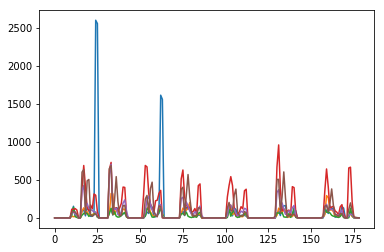

In [1]:
# --------------------------------------------------
#
# per-dimension energy bins
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)[:4500]
W = [(s, s + window_len) for s in range(0, x.shape[0]-inc, inc)]

# energy windows
results = []
for (start, stop) in W:
    window = signal.get_window('boxcar', window_len)
    _, energy = signal.welch(x[start:stop], fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))

# plot results
plt.plot(results)
plt.show()

(4500,) (4500, 3)
[44950 44960 44970 44980 44990]
179 [43750.0, 44000.0, 44250.0, 44500.0, 44750.0]


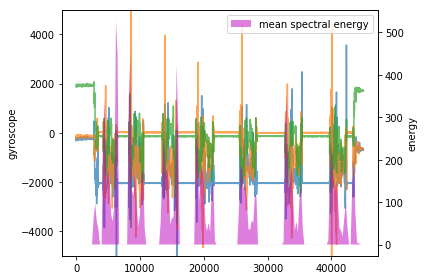

In [2]:
# --------------------------------------------------
#
# energy overlayed with the signals
#
# --------------------------------------------------

# %matplotlib tk
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)[:4500]
W = [(s, s + window_len, (s + s + window_len)/2 * 10) for s in range(0, x.shape[0]-inc, inc)]
t = np.arange(4500) * 10

# energy windows
results = []
rt = []
for (start, stop, _t) in W:
    window = signal.get_window('boxcar', window_len)
    _, energy = signal.welch(x[start:stop], fs, window=window, axis=0)
    results.append(np.mean(energy))
    rt.append(_t)

print(t.shape, x[:,:-3].shape)
print(t[-5:])
print(len(rt), rt[-5:])

# plot results
fig, ax1 = plt.subplots()
ax1.plot(t, x[:,:-3], alpha=.7)
ax1.set_ylabel('gyroscope')
ax1.set_ylim(-5000, 5000)
ax2 = ax1.twinx()
ax2.fill(rt, results, 'm', alpha=.5)
ax2.set_ylabel('energy')
ax2.legend(['mean spectral energy'])
fig.tight_layout()
plt.show()

segmentations 90 90
(90, 6) (26, 6)


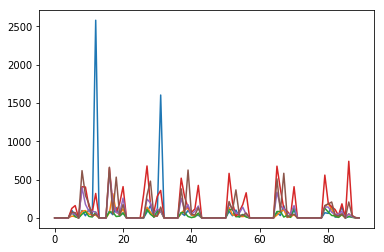

In [15]:
# --------------------------------------------------
#
# energy bins using np.array_split() instead
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)
segs = int(len(x) / window_len)
W = np.array_split(x,segs)
print('segmentations', segs, len(W))


results = []
for w in W:
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
print(R.shape, energy.shape)
# plot results
plt.plot(results)
plt.show()

segmentations 90 90 4506
(4506, 6) (90, 6) (90,)


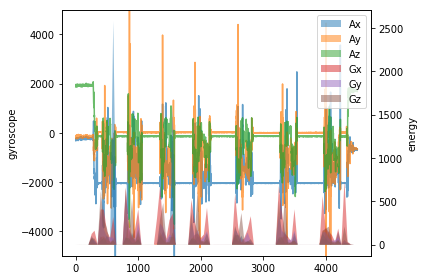

In [34]:
# --------------------------------------------------
#
# energy bins using np.array_split() instead
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5
labels = ['Ax','Ay','Az', 'Gx','Gy','Gz']

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)
segs = int(len(x) / window_len)
W = np.array_split(x,segs)
t = np.arange(len(x))
print('segmentations', segs, len(W), len(t))


results, rt = [], []
for i,w in enumerate(W):
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))
    rt.append(len(w) * i)
R = np.array(results)
print(x.shape, R.shape, np.array(rt).shape)

# plot data
fig, ax1 = plt.subplots()
ax1.plot(t, x[:,:-3], alpha=.7)
ax1.set_ylabel('gyroscope')
ax1.set_ylim(-5000, 5000)
# overlay spectral energy
ax2 = ax1.twinx()
for j in range(R.shape[-1]):
    ax2.fill(rt, R[:,j],label=labels[j], alpha=.5)
ax2.set_ylabel('energy')
ax2.legend()
fig.tight_layout()
plt.show()

(179, 6) (26, 6)


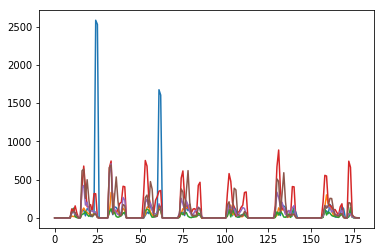

In [16]:
# --------------------------------------------------
#
# np.array_split() with 50% overlap
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5


# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)

def interweave(a,b):
    return np.ravel(np.column_stack((a,b)))

def windows(x, window_len=50):
    # get indices array
    I = np.arange(len(x))
    # divide into possibly uneven window lengths
    segs = int(len(x) / window_len)
    splits = np.array_split(x, segs)
    true_window_lengths = np.array([len(s) for s in splits])
    # get overlap 50% window indices
    incs = (true_window_lengths * 0.5).astype(int)
    i_splits = np.array_split(I, segs)
    i_mins = np.array([s[0] for s in i_splits])
    i_maxs = np.array([s[-1] for s in i_splits])
    i_mids = i_mins + incs
    # get windows into original array
    mids = np.array_split(x, i_mids)
    maxs = np.array_split(x, i_maxs)
    staggered = interweave(mids, maxs)
    return staggered[1:-2]

W = windows(x)
    


results = []
for w in W:
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
print(R.shape, energy.shape)
# plot results
plt.plot(results)
plt.show()

X (67111, 13)
sizes [0, 26, 51, 51, 51] [50, 50, 50, 50, 25]
lens: 2686 2683 2684
indices (2683,)
[ 26  51  77 102 128] [33411 33436 33461 33486 33511 33536 33561 33586 33611 33636] [66986 67011 67036 67061 67086]
shapes (67111, 13) (2683, 13) (0,)
Cx [1.71466711e+03 4.48665283e-04 3.82254902e-04 ... 2.85838462e-03
 6.23915385e-03 3.45000000e-04]


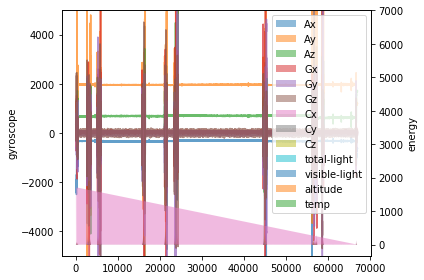

In [6]:
# --------------------------------------------------
#
# Pills-Blue -- overlay energy from all sensors
#
# --------------------------------------------------
# %matplotlib tk
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from functools import wraps


LABELS = ['Ax','Ay','Az', 'Gx','Gy','Gz', 'Cx', 'Cy', 'Cz', 'total-light', 'visible-light', 'altitude', 'temp']
VALID_OVERLAPS = [0, .5, .66, .75, .8, .9, .95]

# config  params
FILE = 'data/pills-blue.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

X = np.load(FILE)
print('X', X.shape)



def valid_overlap(f):
    @wraps(f)
    def wrapper(overlap, *args):
        if overlap not in VALID_OVERLAPS:
            raise ValueError('Cannot handle overlap of: {}. Valid values are: {}'.format(overlap, VALID_OVERLAPS))
        return f(overlap, *args)
    return wrapper

def windows(x, window_len=50, overlap=0.5):
    # get indices array
    I = np.arange(len(x))
    # divide into possibly uneven window lengths
    segs = int(len(x) / window_len)
    splits = np.array_split(I, segs)
    lengths = np.array([len(s) for s in splits])
    mins = np.array([s[0] for s in splits])
    min_len = np.min(lengths)
    # get index windows for each increment
    incs = increments(overlap, lengths)
    idxs = mins + incs
    # get windows into original array
    _windows = [np.array_split(x, row) for row in idxs]
    result = interweave(*_windows)
    sizes = [len(w) for w in result]
    durations = [(w[0], w[-1]) for w in result if len(w) > 0]
    print('sizes', sizes[:5], sizes[-5:])
    old_len = len(result)
    result = [w for w in result if len(w) >= min_len]
    
    # get indices windows
    indices = interweave(*idxs)
    print('lens:', old_len, len(result), len(indices))
    return result, indices

def interweave(*a):
    return np.ravel(np.column_stack(a))

@valid_overlap
def increments(overlap, lengths):
    overlap = unround(overlap)  # fixes floating point rounding when computing increments
    inc = round(1-overlap, 2)
    iters = round(1/inc)
    incs = np.array([inc*i for i in range(iters)]).reshape(-1, 1)
    return (lengths * incs).round().astype(int)

def unround(overlap):
    if overlap == .66:
        return 2/3
    return overlap



W, idxs = windows(X, window_len, window_overlap)
idxs = idxs[1:]
print('indices', idxs.shape)
print(idxs[:5], idxs[1335: 1345], idxs[-5:])


results, rt = [], []
for i,w in enumerate(W):
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
print('shapes', X.shape, R.shape, np.array(rt).shape)

print('Cx', R[:, 6])

# plot data
fig, ax1 = plt.subplots()
ax1.plot(X[:,:6], alpha=.7)
ax1.set_ylabel('gyroscope')
ax1.set_ylim(-5000, 5000)
# overlay spectral energy
ax2 = ax1.twinx()
for j in range(R.shape[-1]):
    ax2.fill(idxs, R[:,j],label=LABELS[j], alpha=.5)
ax2.set_ylabel('energy')
ax2.legend()
fig.tight_layout()
plt.show()

In [2]:
# --------------------------------------------------
#
# detrending
#
# --------------------------------------------------
%matplotlib tk
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from functools import wraps

FILE = 'data/pills-blue.npy'
LABELS = ['Ax','Ay','Az', 'Gx','Gy','Gz', 'Cx', 'Cy', 'Cz', 'total-light', 'visible-light', 'altitude', 'temp']
VALID_OVERLAPS = [0, .5, .66, .75, .8, .9, .95]
SENSORS = {'Accelerometer': [0, 1, 2],
          'Gyroscope': [3,4,5],
          'Compass': [6,7,8],
          'Light': [9,10],
          'Barometer': [11,12]}

# config  params

fs = 10  # used to scale down spectral energy result
window_len = 50
window_overlap = .5
detrend = 'linear'
OMITTED = ['Cx']
SHOW_SENSORS = ['Accelerometer']

# derived values
X = np.load(FILE)
xi = np.arange(X.shape[0])
print('X', X.shape, xi.shape)
DIMS = np.arange(X.shape[1])
omitted_dims = [i for i,l in enumerate(LABELS) if l in OMITTED]
USED_DIMS = [i for i in DIMS if i not in omitted_dims]
USED_SENSORS = [(k, SENSORS[k]) for k in SHOW_SENSORS]
print('dims', DIMS)
print('omitted', omitted_dims, OMITTED)
print('used', USED_DIMS)
print('used sensors:', USED_SENSORS)



def valid_overlap(f):
    @wraps(f)
    def wrapper(overlap, *args):
        if overlap not in VALID_OVERLAPS:
            raise ValueError('Cannot handle overlap of: {}. Valid values are: {}'.format(overlap, VALID_OVERLAPS))
        return f(overlap, *args)
    return wrapper

def windows(x, window_len=50, overlap=0.5):
    # get indices array
    I = np.arange(len(x))
    # divide into possibly uneven window lengths
    segs = int(len(x) / window_len)
    splits = np.array_split(I, segs)
    lengths = np.array([len(s) for s in splits])
    mins = np.array([s[0] for s in splits])
    min_len = np.min(lengths)
    # get index windows for each increment
    incs = increments(overlap, lengths)
    idxs = mins + incs
    # get windows into original array
    _windows = [np.array_split(x, row) for row in idxs]
    result = interweave(*_windows)
    sizes = [len(w) for w in result]
    durations = [(w[0], w[-1]) for w in result if len(w) > 0]
    print('sizes', sizes[:5], sizes[-5:])
    old_len = len(result)
    result = [w for w in result if len(w) >= min_len]
    
    # get indices windows
    print(idxs.shape)
    indices = interweave(*idxs)
    print('lens:', old_len, len(result), len(indices))
    return result, indices

def interweave(*a):
    return np.ravel(np.column_stack(a))

@valid_overlap
def increments(overlap, lengths):
    overlap = unround(overlap)  # fixes floating point rounding when computing increments
    inc = round(1-overlap, 2)
    iters = round(1/inc)
    incs = np.array([inc*i for i in range(iters)]).reshape(-1, 1)
    return (lengths * incs).round().astype(int)

def unround(overlap):
    if overlap == .66:
        return 2/3
    return overlap



W, idxs = windows(X, window_len, window_overlap)
idxs = idxs[1:]
print('indices', idxs.shape)
print(idxs[:5], idxs[1335: 1345],  idxs[-5:])


results, rt = [], []
for i,w in enumerate(W):
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, detrend=detrend, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
print('shapes', X.shape, R.shape, np.array(idxs).shape)

# plot data
for name in SHOW_SENSORS:
    _dims = SENSORS[name]
    fig, ax1 = plt.subplots()
    ax1.plot(xi, X[:, _dims], alpha=.7)
    ax1.set_ylabel(name)
    # overlay spectral energy
    ax2 = ax1.twinx()
    for j in USED_DIMS:
        ax2.fill(idxs, R[:,j],label=LABELS[j], alpha=.5)
    ax2.set_ylabel('energy')
    ax2.legend()
    fig.tight_layout()
    fig.canvas.set_window_title(name)
    plt.show()

X (67111, 13) (67111,)
dims [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
omitted [6] ['Cx']
used [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]
used sensors: [('Accelerometer', [0, 1, 2])]
sizes [0, 26, 51, 51, 51] [50, 50, 50, 50, 25]
(2, 1342)
lens: 2686 2683 2684
indices (2683,)
[ 26  51  77 102 128] [33411 33436 33461 33486 33511 33536 33561 33586 33611 33636] [66986 67011 67036 67061 67086]
shapes (67111, 13) (2683, 13) (2683,)


In [8]:
# --------------------------------------------------
#
# detrending
#
# --------------------------------------------------
%matplotlib tk
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from functools import wraps

FILE = 'data/pills-blue.npy'
LABELS = ['Ax','Ay','Az', 'Gx','Gy','Gz', 'Cx', 'Cy', 'Cz', 'total-light', 'visible-light', 'altitude', 'temp']
VALID_OVERLAPS = [0, .5, .66, .75, .8, .9, .95]
SENSORS = {'Accelerometer': [0, 1, 2],
          'Gyroscope': [3,4,5],
          'Compass': [6,7,8],
          'Light': [9,10],
          'Barometer': [11,12]}

# config  params

fs = 10  # used to scale down spectral energy result
window_len = 50
window_overlap = .5
detrend = 'linear'
OMITTED = ['Cx']
SHOW_SENSORS = ['Accelerometer']

# derived values
X = np.load(FILE)
xi = np.arange(X.shape[0])
print('X', X.shape, xi.shape)
DIMS = np.arange(X.shape[1])
omitted_dims = [i for i,l in enumerate(LABELS) if l in OMITTED]
USED_DIMS = [i for i in DIMS if i not in omitted_dims]
USED_SENSORS = [(k, SENSORS[k]) for k in SHOW_SENSORS]
print('dims', DIMS)
print('omitted', omitted_dims, OMITTED)
print('used', USED_DIMS)
print('used sensors:', USED_SENSORS)



def valid_overlap(f):
    @wraps(f)
    def wrapper(overlap, *args):
        if overlap not in VALID_OVERLAPS:
            raise ValueError('Cannot handle overlap of: {}. Valid values are: {}'.format(overlap, VALID_OVERLAPS))
        return f(overlap, *args)
    return wrapper

def windows(x, window_len=50, overlap=0.5):
    # get indices array
    I = np.arange(len(x))
    # divide into possibly uneven window lengths
    segs = int(len(x) / window_len)
    splits = np.array_split(I, segs)
    lengths = np.array([len(s) for s in splits])
    mins = np.array([s[0] for s in splits])
    min_len = np.min(lengths)
    # get index windows for each increment
    incs = increments(overlap, lengths)
    idxs = mins + incs
    # get windows into original array
    _windows = [np.array_split(x, row) for row in idxs]
    result = interweave(*_windows)
    sizes = [len(w) for w in result]
    durations = [(w[0], w[-1]) for w in result if len(w) > 0]
    print('sizes', sizes[:5], sizes[-5:])
    old_len = len(result)
    result = [w for w in result if len(w) >= min_len]
    
    # get indices windows
    print(idxs.shape)
    indices = interweave(*idxs)
    print('lens:', old_len, len(result), len(indices))
    return result, indices

def interweave(*a):
    return np.ravel(np.column_stack(a))

@valid_overlap
def increments(overlap, lengths):
    overlap = unround(overlap)  # fixes floating point rounding when computing increments
    inc = round(1-overlap, 2)
    iters = round(1/inc)
    incs = np.array([inc*i for i in range(iters)]).reshape(-1, 1)
    return (lengths * incs).round().astype(int)

def unround(overlap):
    if overlap == .66:
        return 2/3
    return overlap



W, idxs = windows(X, window_len, window_overlap)
idxs = idxs[1:]
print('indices', idxs.shape)
print(idxs[:5], idxs[1335: 1345],  idxs[-5:])


results, rt = [], []
for i,w in enumerate(W):
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, detrend=detrend, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
R = R / np.linalg.norm(R)
print('shapes', X.shape, R.shape, np.array(idxs).shape)

# plot data
for name in SHOW_SENSORS:
    _dims = SENSORS[name]
    fig, ax1 = plt.subplots()
    ax1.plot(xi, X[:, _dims], alpha=.7)
    ax1.set_ylabel(name)
    # overlay spectral energy
    ax2 = ax1.twinx()
    for j in USED_DIMS:
        ax2.fill(idxs, R[:,j],label=LABELS[j], alpha=.5)
    ax2.set_ylabel('energy')
    ax2.legend()
    fig.tight_layout()
    fig.canvas.set_window_title(name)
    plt.show()

X (67111, 13) (67111,)
dims [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
omitted [6] ['Cx']
used [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]
used sensors: [('Accelerometer', [0, 1, 2])]
sizes [0, 26, 51, 51, 51] [50, 50, 50, 50, 25]
(2, 1342)
lens: 2686 2683 2684
indices (2683,)
[ 26  51  77 102 128] [33411 33436 33461 33486 33511 33536 33561 33586 33611 33636] [66986 67011 67036 67061 67086]
shapes (67111, 13) (2683, 13) (2683,)


In [7]:
# --------------------------------------------------
#
# various fs/detrend values
#
# --------------------------------------------------
%matplotlib tk
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from functools import wraps

FILE = 'data/pills-blue.npy'
LABELS = ['Ax','Ay','Az', 'Gx','Gy','Gz', 'Cx', 'Cy', 'Cz', 'total-light', 'visible-light', 'altitude', 'temp']
VALID_OVERLAPS = [0, .5, .66, .75, .8, .9, .95]
SENSORS = {'Accelerometer': [0, 1, 2],
          'Gyroscope': [3,4,5],
          'Compass': [6,7,8],
          'Light': [9,10],
          'Barometer': [11,12]}

# config  params

fss = [1, 100, 10000]
window_len = 50
window_overlap = .5
detrends = [False, 'linear']

# derived values
X = np.load(FILE)



def valid_overlap(f):
    @wraps(f)
    def wrapper(overlap, *args):
        if overlap not in VALID_OVERLAPS:
            raise ValueError('Cannot handle overlap of: {}. Valid values are: {}'.format(overlap, VALID_OVERLAPS))
        return f(overlap, *args)
    return wrapper

def windows(x, window_len=50, overlap=0.5):
    # get indices array
    I = np.arange(len(x))
    # divide into possibly uneven window lengths
    segs = int(len(x) / window_len)
    splits = np.array_split(I, segs)
    lengths = np.array([len(s) for s in splits])
    mins = np.array([s[0] for s in splits])
    min_len = np.min(lengths)
    # get index windows for each increment
    incs = increments(overlap, lengths)
    idxs = mins + incs
    # get windows into original array
    _windows = [np.array_split(x, row) for row in idxs]
    result = interweave(*_windows)
    sizes = [len(w) for w in result]
    durations = [(w[0], w[-1]) for w in result if len(w) > 0]
    result = [w for w in result if len(w) >= min_len]
    return result

def interweave(*a):
    return np.ravel(np.column_stack(a))

@valid_overlap
def increments(overlap, lengths):
    overlap = unround(overlap)  # fixes floating point rounding when computing increments
    inc = round(1-overlap, 2)
    iters = round(1/inc)
    incs = np.array([inc*i for i in range(iters)]).reshape(-1, 1)
    return (lengths * incs).round().astype(int)

def unround(overlap):
    if overlap == .66:
        return 2/3
    return overlap


def compute_energy(wlen, overlap, fs, detrend):
    W = windows(X, wlen, overlap)
    results = []
    for i,w in enumerate(W):
        window = signal.get_window('boxcar', len(w))
        _, energy = signal.welch(w, fs, window=window, detrend=detrend, axis=0)
        results.append(np.mean(energy, axis=0))
    return np.array(results)

np.set_printoptions(suppress=True, linewidth=120)


for detrend in detrends:
    for fs in fss:
        R = compute_energy(window_len, window_overlap, fs, detrend)
        print()
        p1 = np.percentile(R, 0, axis=0)
        p2 = np.percentile(R, 25, axis=0)
        p3 = np.percentile(R, 50, axis=0)
        p4 = np.percentile(R, 90, axis=0)
        p5 = np.percentile(R, 95, axis=0)
        p6 = np.percentile(R, 100, axis=0)
        P = np.stack([p1,p2,p3,p4,p5,p6])
        print('fs = {}, detrend = {}'.format(fs, detrend))
        print(P.T)
        print(np.mean(R))
        print(np.var(R))


fs = 1, detrend = False
[[2.01055769e+04 1.85250288e+05 2.09881000e+05 2.21691977e+05 4.48974908e+05 8.20340846e+06]
 [8.04796923e+04 7.35312938e+06 7.39103992e+06 7.53964228e+06 7.65662142e+06 2.35041313e+07]
 [1.66010000e+04 9.07833269e+05 9.25368923e+05 9.86606877e+05 1.14628963e+06 7.96857323e+06]
 [2.20484615e+03 3.33228846e+03 3.69203846e+03 9.82402077e+04 1.14012857e+06 2.68133105e+07]
 [1.36130769e+03 2.80921154e+03 3.21573077e+03 1.29892354e+05 9.59241258e+05 8.65807158e+07]
 [3.09003846e+03 7.40701923e+03 8.36846154e+03 1.28372538e+05 9.39753754e+05 2.58668312e+07]
 [8.06058538e+03 2.58998483e+08 2.59420153e+08 2.66375546e+08 2.66493299e+08 2.73984761e+08]
 [1.50163000e+03 2.59862687e+04 4.62837588e+04 1.20032610e+05 1.21614328e+05 3.11459671e+08]
 [1.38492453e+08 1.53802549e+08 1.56762833e+08 1.58946714e+08 1.58993068e+08 1.62770660e+08]
 [1.70610192e+03 1.29242149e+04 1.52326923e+04 3.00480769e+04 3.05307692e+04 3.05307692e+04]
 [2.24706154e+01 1.80328308e+02 1.92307692e+0

In [1]:
# --------------------------------------------------
#
# detrending
#
# --------------------------------------------------
%matplotlib tk
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from functools import wraps

FILE = 'data/pills-blue.npy'
LABELS = ['Ax','Ay','Az', 'Gx','Gy','Gz', 'Cx', 'Cy', 'Cz', 'total-light', 'visible-light', 'altitude', 'temp']
VALID_OVERLAPS = [0, .5, .66, .75, .8, .9, .95]
SENSORS = {'Accelerometer': [0, 1, 2],
          'Gyroscope': [3,4,5],
          'Compass': [6,7,8],
          'Light': [9,10],
          'Barometer': [11,12]}

# config  params

fs = 10000  # used to scale down spectral energy result
window_len = 50
window_overlap = .5
detrend = False
OMITTED = ['Cx']
SHOW_SENSORS = ['Accelerometer']

# derived values
X = np.load(FILE)
xi = np.arange(X.shape[0])
print('X', X.shape, xi.shape)
DIMS = np.arange(X.shape[1])
omitted_dims = [i for i,l in enumerate(LABELS) if l in OMITTED]
USED_DIMS = [i for i in DIMS if i not in omitted_dims]
USED_SENSORS = [(k, SENSORS[k]) for k in SHOW_SENSORS]
print('dims', DIMS)
print('omitted', omitted_dims, OMITTED)
print('used', USED_DIMS)
print('used sensors:', USED_SENSORS)



def valid_overlap(f):
    @wraps(f)
    def wrapper(overlap, *args):
        if overlap not in VALID_OVERLAPS:
            raise ValueError('Cannot handle overlap of: {}. Valid values are: {}'.format(overlap, VALID_OVERLAPS))
        return f(overlap, *args)
    return wrapper

def windows(x, window_len=50, overlap=0.5):
    # get indices array
    I = np.arange(len(x))
    # divide into possibly uneven window lengths
    segs = int(len(x) / window_len)
    splits = np.array_split(I, segs)
    lengths = np.array([len(s) for s in splits])
    mins = np.array([s[0] for s in splits])
    min_len = np.min(lengths)
    # get index windows for each increment
    incs = increments(overlap, lengths)
    idxs = mins + incs
    # get windows into original array
    _windows = [np.array_split(x, row) for row in idxs]
    result = interweave(*_windows)
    sizes = [len(w) for w in result]
    durations = [(w[0], w[-1]) for w in result if len(w) > 0]
    print('sizes', sizes[:5], sizes[-5:])
    old_len = len(result)
    result = [w for w in result if len(w) >= min_len]
    
    # get indices windows
    print(idxs.shape)
    indices = interweave(*idxs)
    print('lens:', old_len, len(result), len(indices))
    return result, indices

def interweave(*a):
    return np.ravel(np.column_stack(a))

@valid_overlap
def increments(overlap, lengths):
    overlap = unround(overlap)  # fixes floating point rounding when computing increments
    inc = round(1-overlap, 2)
    iters = round(1/inc)
    incs = np.array([inc*i for i in range(iters)]).reshape(-1, 1)
    return (lengths * incs).round().astype(int)

def unround(overlap):
    if overlap == .66:
        return 2/3
    return overlap



W, idxs = windows(X, window_len, window_overlap)
idxs = idxs[1:]
print('indices', idxs.shape)
print(idxs[:5], idxs[1335: 1345],  idxs[-5:])


results, rt = [], []
for i,w in enumerate(W):
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, detrend=detrend, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
print('shapes', X.shape, R.shape, np.array(idxs).shape)

# plot data
for name in SHOW_SENSORS:
    _dims = SENSORS[name]
    fig, ax1 = plt.subplots()
    ax1.plot(xi, X[:, _dims], alpha=.7)
    ax1.set_ylabel(name)
    # overlay spectral energy
    ax2 = ax1.twinx()
    for j in USED_DIMS:
        ax2.fill(idxs, R[:,j],label=LABELS[j], alpha=.5)
    ax2.set_ylabel('energy')
    ax2.legend()
    fig.tight_layout()
    fig.canvas.set_window_title(name)
    plt.show()

X (67111, 13) (67111,)
dims [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
omitted [6] ['Cx']
used [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]
used sensors: [('Accelerometer', [0, 1, 2])]
sizes [0, 26, 51, 51, 51] [50, 50, 50, 50, 25]
(2, 1342)
lens: 2686 2683 2684
indices (2683,)
[ 26  51  77 102 128] [33411 33436 33461 33486 33511 33536 33561 33586 33611 33636] [66986 67011 67036 67061 67086]
shapes (67111, 13) (2683, 13) (2683,)
